In [89]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
class Node:
    def __init__(self, name):
        self.name = name

In [44]:
d = {Node('a'): [(Node('b'), 'addition')], Node('b'):[(Node('c'), 'exponent'), (Node('d'), 'sin')] }

In [45]:
G = nx.DiGraph()

In [59]:
for key in d.keys():
    print(key.name)
    G.add_node(key, label = key.name)
    neighbors = d[key]
    for neighbor in neighbors:
        G.add_edge(key, neighbor[0], label = neighbor[1])
        G.add_node(neighbor[0], label = neighbor[0].name)

a
b


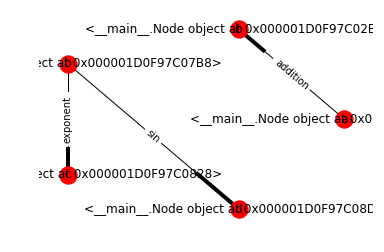

In [63]:
edge_labs = nx.get_edge_attributes(G, 'label')
nod_labs = nx.get_node_attributes(G, 'label')
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_labels(G, pos, labels = nod_labs)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labs)
limits=plt.axis('off')

In [61]:
nod_labs

{<__main__.Node at 0x1d0f97c0160>: 'a',
 <__main__.Node at 0x1d0f97c02e8>: 'b',
 <__main__.Node at 0x1d0f97c07b8>: 'b',
 <__main__.Node at 0x1d0f97c0828>: 'c',
 <__main__.Node at 0x1d0f97c08d0>: 'd'}

In [68]:
#clean
d = {'a': [('b', 'addition')], 'b':[('c', 'exponent'), ('d', 'sin')] }
G = nx.DiGraph()
for key in d.keys():
    G.add_node(key)
    neighbors = d[key]
    for neighbor in neighbors:
        G.add_edge(key, neighbor[0], label = neighbor[1])

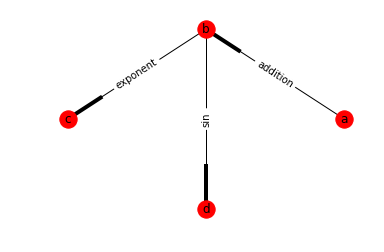

In [69]:
edge_labs = nx.get_edge_attributes(G, 'label')
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labs)
limits=plt.axis('off')

In [6]:
import numpy as np

In [94]:
def merge_dicts(d1, d2):
    dnew = d1.copy()
    for key in d2:
        if key in dnew:
            dnew[key] = dnew[key] + d2[key]
        else:
            dnew[key] = d2[key]
    return dnew

In [98]:
class ADnum:
    def __init__(self, value, **kwargs):
        try:
            value = np.array(value)
            value = value.astype(float)
            self.val = value
            der = kwargs['der']
            der = np.array(der)
            der = der.astype(float)
            self.der = der
            if 'graph' not in kwargs:
                self.graph = {}
            else:
                self.graph = kwargs['graph']
        except:
            raise ValueError('need numeric')
            
            
    def __mul__(self, other):
        try:
            graph = merge_dicts(self.graph, other.graph)
            y = ADnum(self.val*other.val, der = self.val*other.der+self.der*other.val)
            y.graph = graph
            if self not in y.graph:
                y.graph[self] = []
            y.graph[self].append((y, 'multiplication'))
            if other not in y.graph:
                y.graph[other]= []
            y.graph[other].append((y, 'multiplication'))
            return y
        except AttributeError:
            other = ADnum(other*np.ones(np.shape(self.val)), der = np.zeros(np.shape(self.der)))
            return self*other
    def __rmul__(self, other):
        return self.__mul__(other)
    
    def __add__(self, other):
        try:
            graph = merge_dicts(self.graph, other.graph)
            y = ADnum(self.val+other.val, der = self.der+other.der)
            y.graph = graph
            if self not in y.graph:
                y.graph[self] = []
            y.graph[self].append((y, 'addition'))
            if other not in y.graph:
                y.graph[other] = []
            y.graph[other].append((y, 'addition'))
            return y
        except AttributeError:
            other = ADnum(other*np.ones(np.shape(self.val)), der = np.zeros(np.shape(self.der)))
            return self+other

In [99]:
x = ADnum(5, der = 1)

In [100]:
y =  5*x+3*x

In [101]:
G = nx.DiGraph()
d = y.graph
for key in d.keys():
    G.add_node(key)
    neighbors = d[key]
    for neighbor in neighbors:
        G.add_edge(key, neighbor[0], label = neighbor[1])

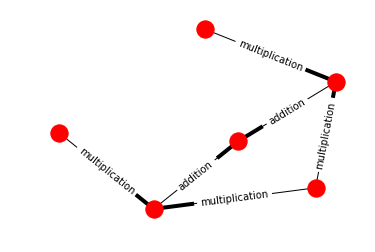

In [104]:
edge_labs = nx.get_edge_attributes(G, 'label')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels = False)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labs)
limits=plt.axis('off')

In [103]:
y.graph

{<__main__.ADnum at 0x296bae73e10>: [(<__main__.ADnum at 0x296bae73b38>,
   'multiplication'),
  (<__main__.ADnum at 0x296baf4dac8>, 'multiplication')],
 <__main__.ADnum at 0x296bae73550>: [(<__main__.ADnum at 0x296bae73b38>,
   'multiplication')],
 <__main__.ADnum at 0x296badee7b8>: [(<__main__.ADnum at 0x296baf4dac8>,
   'multiplication')],
 <__main__.ADnum at 0x296bae73b38>: [(<__main__.ADnum at 0x296baf4db00>,
   'addition')],
 <__main__.ADnum at 0x296baf4dac8>: [(<__main__.ADnum at 0x296baf4db00>,
   'addition')]}